In [71]:
# все импорты + отключение futureWarning 
from ripser import ripser
from persim import plot_diagrams
from sklearn import datasets

import numpy as np
import ripser
import persim

from matplotlib import pyplot as plt
from sklearn.decomposition import KernelPCA

from collections import OrderedDict
from functools import partial
from time import time

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets
from matplotlib.pyplot import figure

import math

from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

In [72]:
def generate_cylinder(n_points, noise=0):
    z = np.random.rand(n_points)
    alphas = np.random.rand(n_points) * 2 * np.pi
    
    x, y = np.cos(alphas), np.sin(alphas)
    
    return np.stack((x, y, z), axis=1) + noise * np.random.randn(n_points, 3)

### For linear PCA we get the following

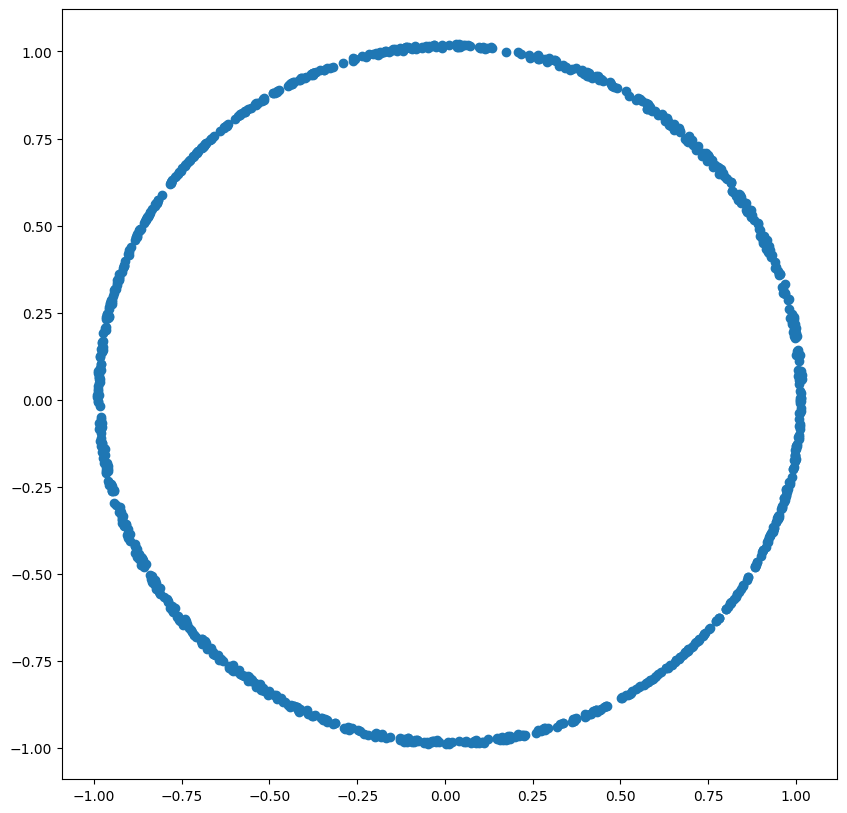

In [73]:
pca = KernelPCA(2)
points = pca.fit_transform(generate_cylinder(1000))

plt.figure(figsize=(10, 10))
plt.scatter(points[:, 0], points[:, 1])
plt.show()

### For kernel PCA with sigmoid kernel we get this parametric family of images

Gamma = 0.1


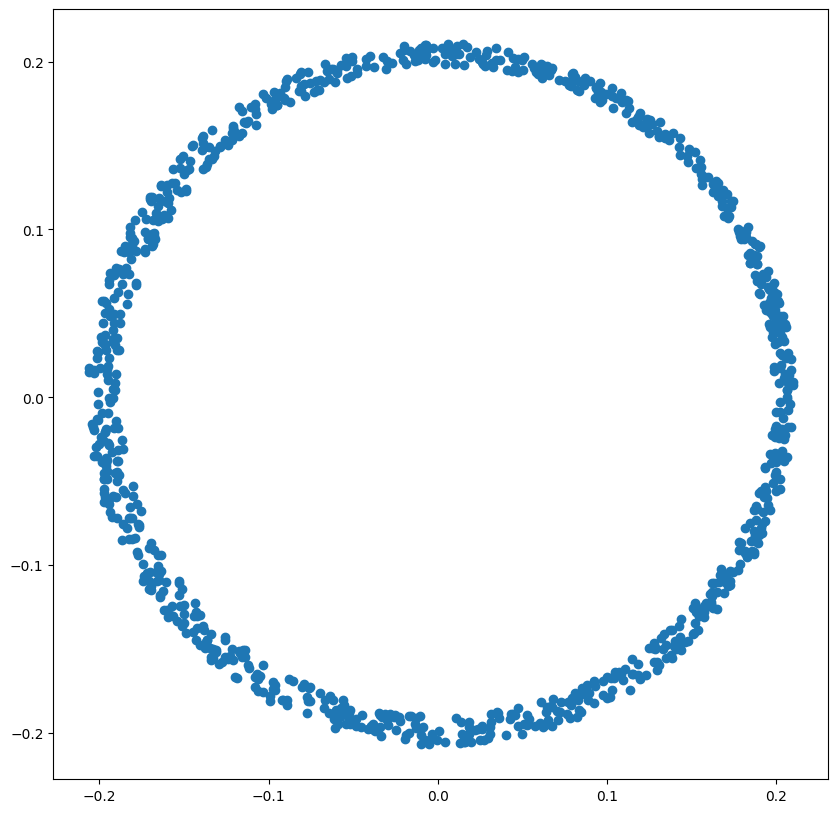

Gamma = 1


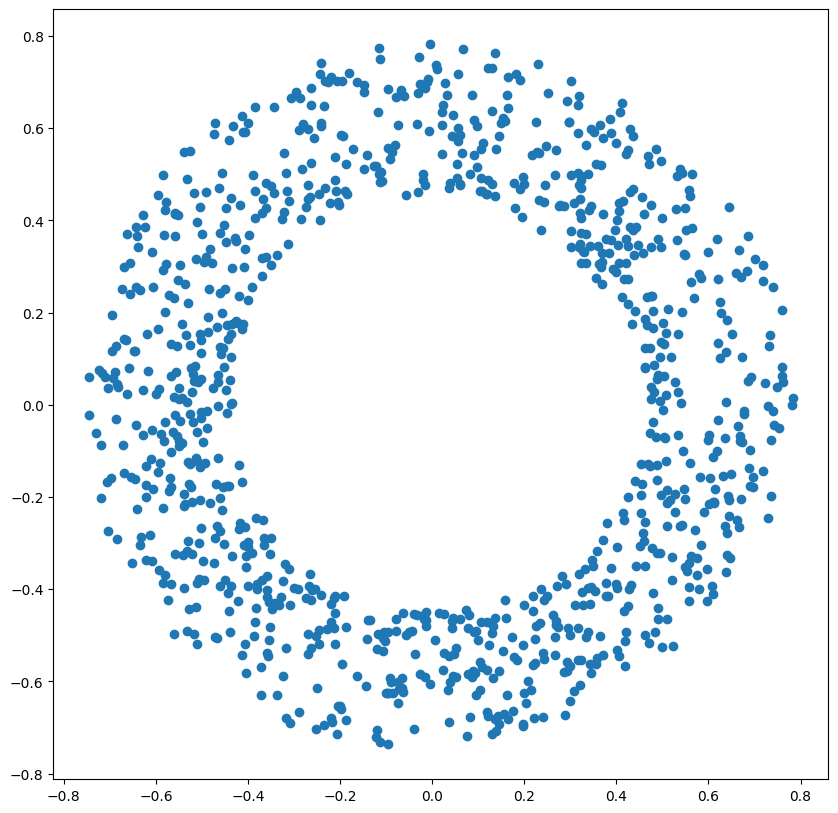

Gamma = 2


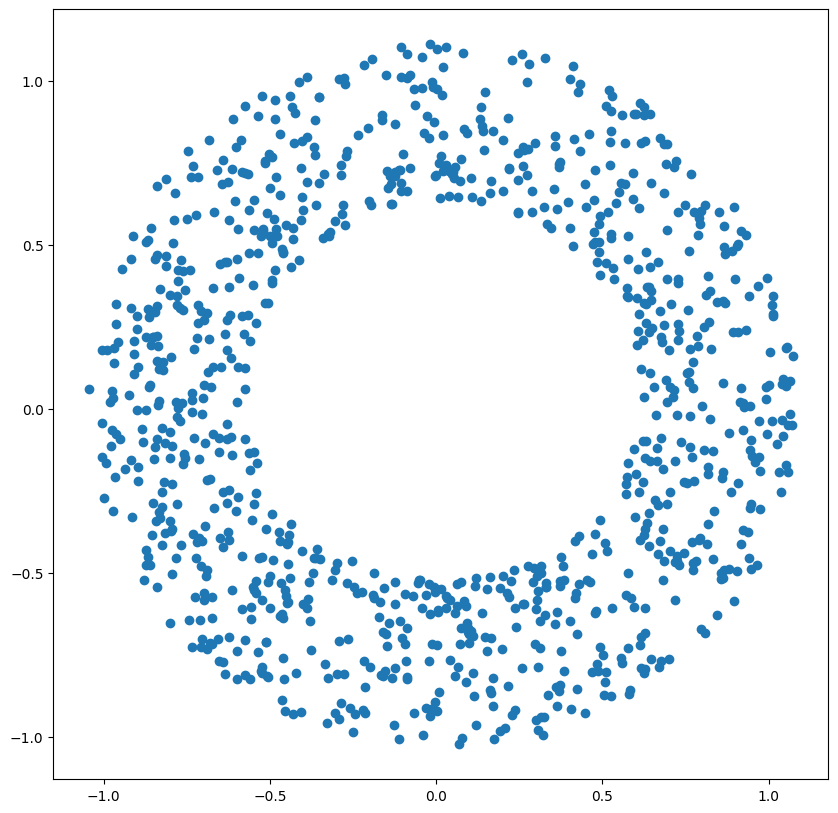

Gamma = 3


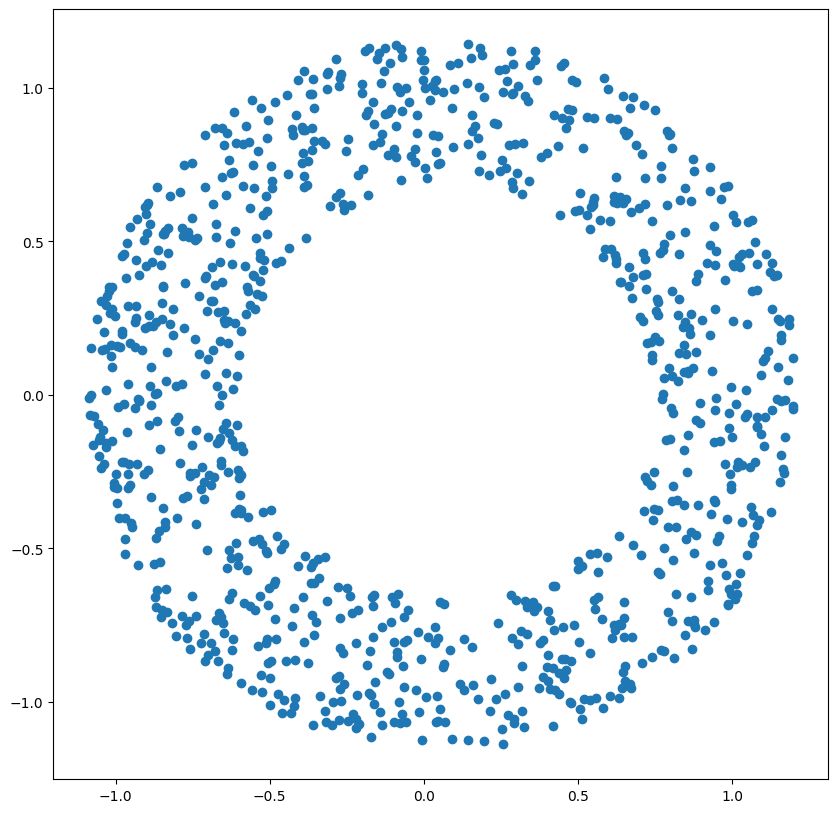

Gamma = 6


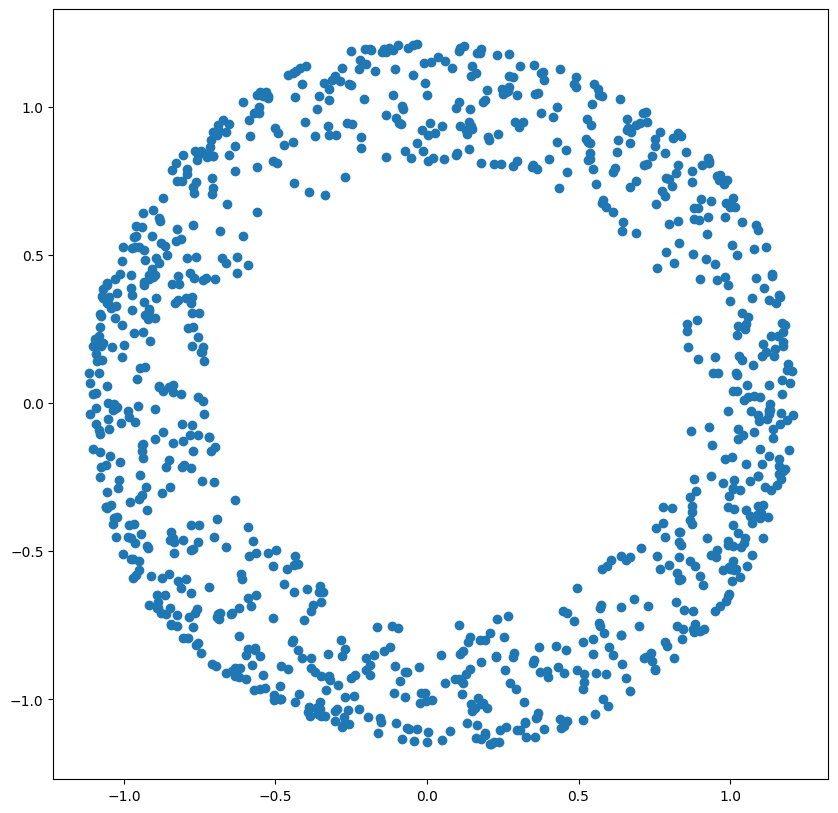

Gamma = 10


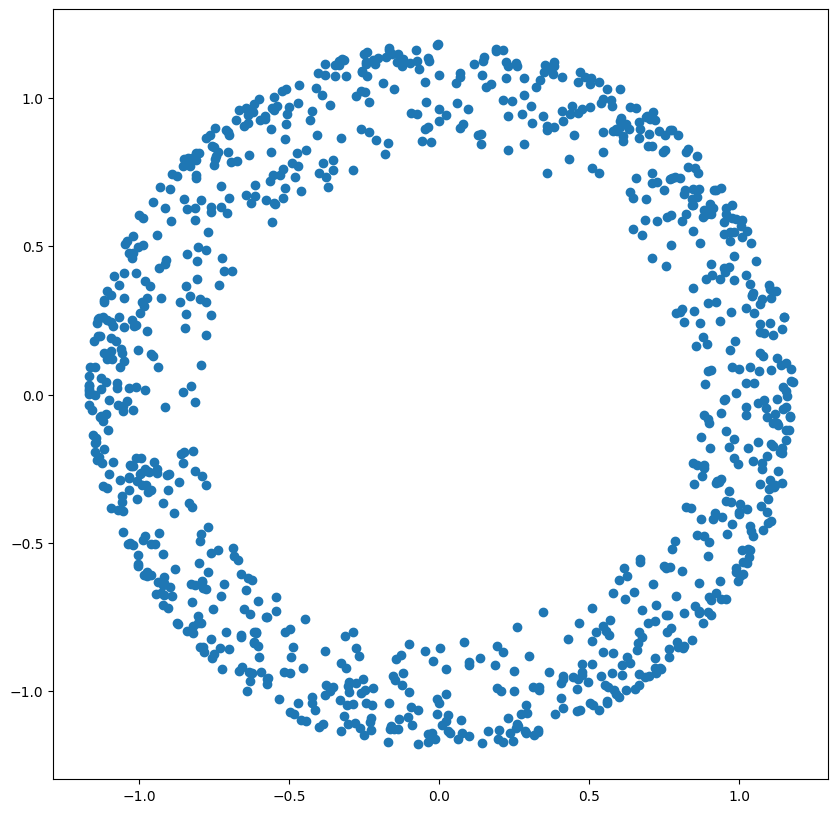

Gamma = 30


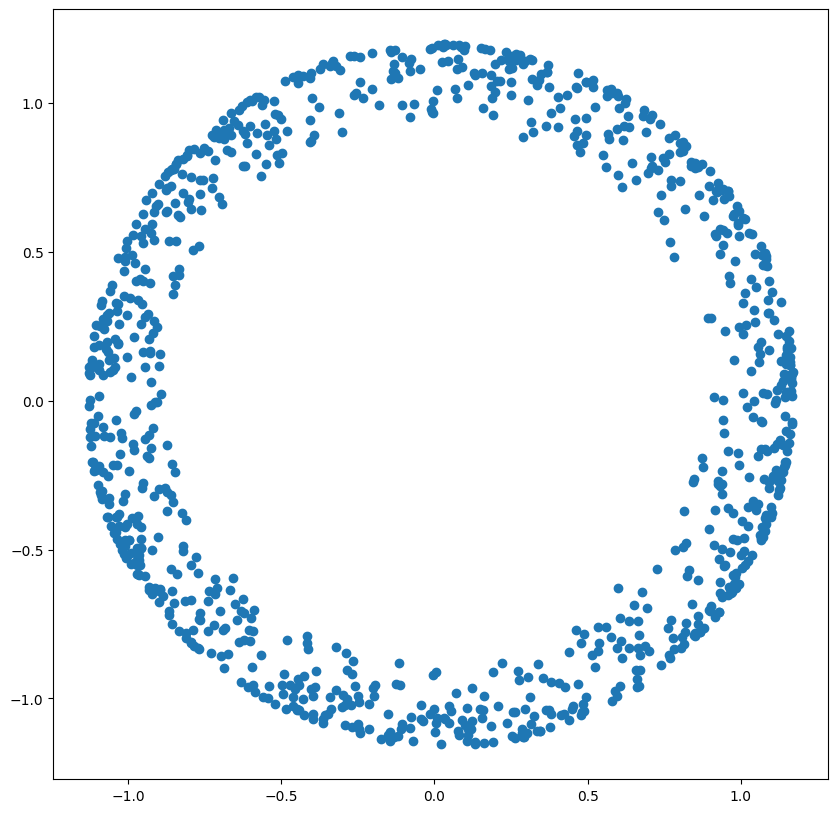

Gamma = 100


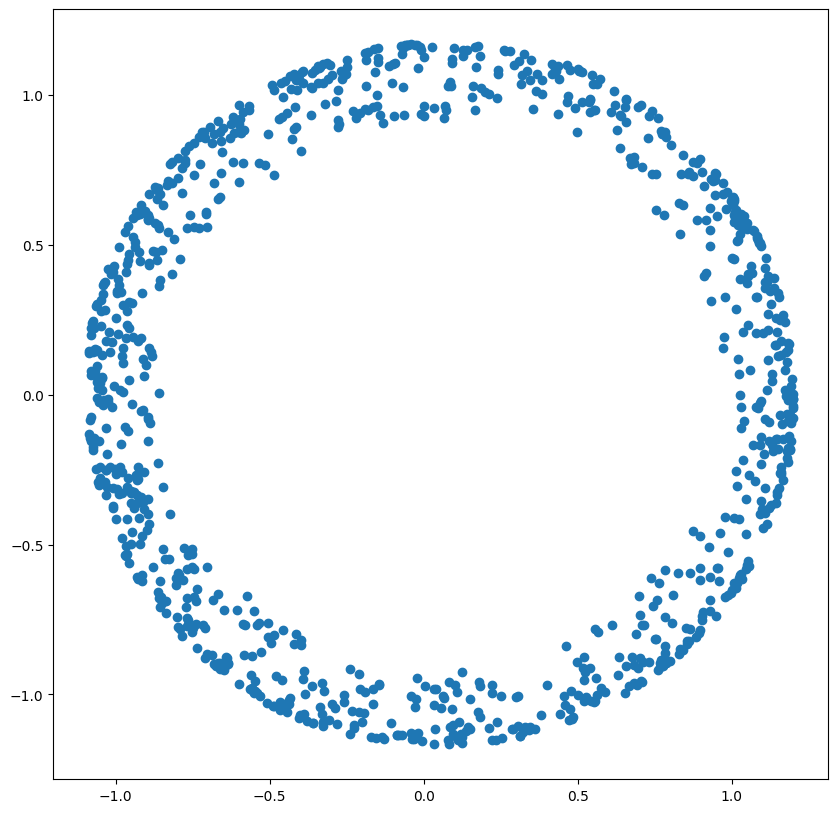

In [74]:
gammas = [0.1, 1, 2, 3, 6, 10, 30, 100]

for gamma in gammas:
    pca = KernelPCA(2, kernel='sigmoid', gamma=gamma)

    orig_points = generate_cylinder(1000)
    points = pca.fit_transform(orig_points)

    print('Gamma = {}'.format(gamma))
    
    plt.figure(figsize=(10, 10))

    plt.scatter(points[:, 0], points[:, 1])
    plt.show()

### Now we can calculate the distances

In [75]:
def calc_distance(points_0, points_1):
    pers_0 = ripser(points_0)
    pers_1 = ripser(points_1)

    return persim.wasserstein(
        np.concatenate((pers_0['dgms'][0][:-1], pers_0['dgms'][1]), axis=0),
        np.concatenate((pers_1['dgms'][0][:-1], pers_1['dgms'][1]), axis=0)
    )

def calc_distances(gammas, n_points=100):
    results = []
    for gamma in gammas:
        pca = KernelPCA(2, kernel='sigmoid', gamma=gamma)
        
        points_3d = generate_cylinder(n_points)
        points_2d = pca.fit_transform(points_3d)
        
        results.append(calc_distance(points_3d, points_2d))
                       
    return results

In [77]:
import ripser

distances_list = []
for _ in range(10):
    distances_list.append(calc_distances(gammas, n_points=100))
    
distances = np.array(distances_list)
print(distances)

TypeError: 'module' object is not callable

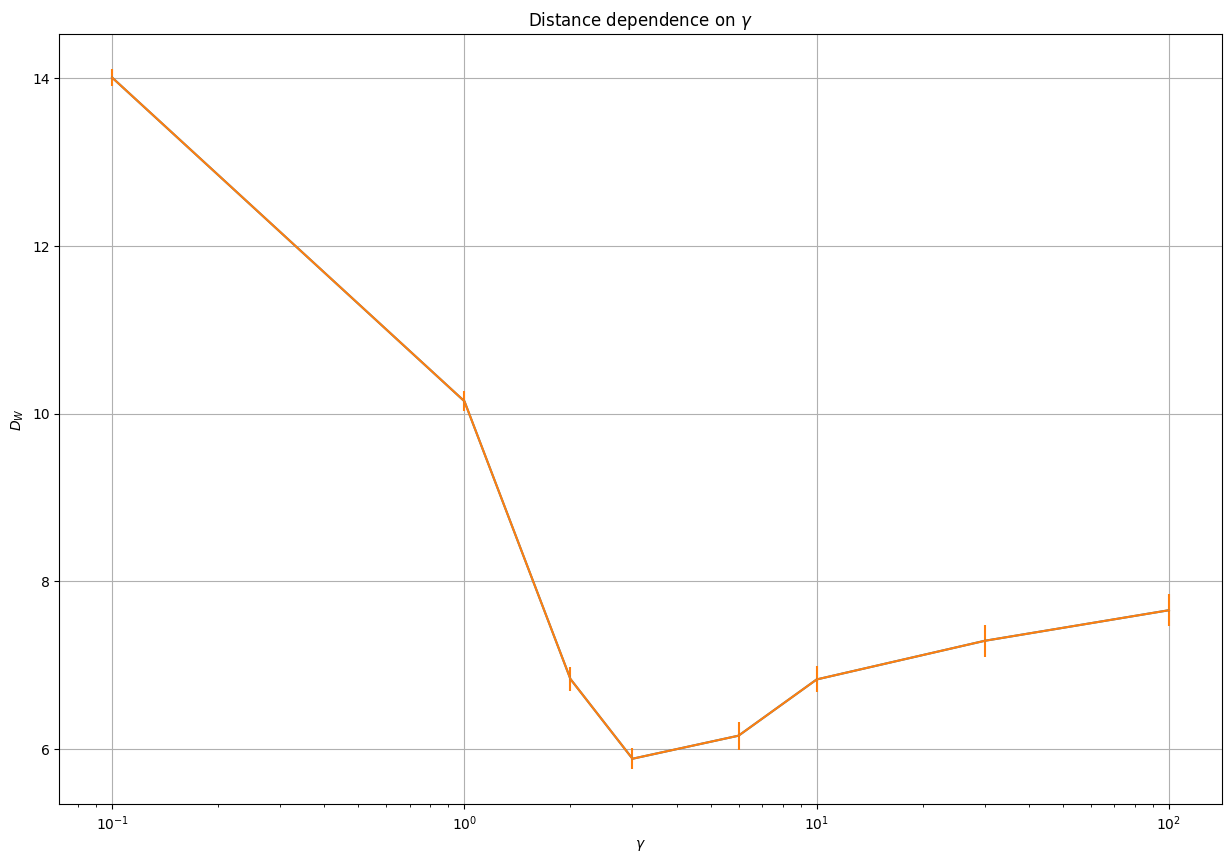

In [40]:
plt.figure(figsize=(15, 10))

plt.semilogx(gammas, distances.mean(axis=0))
plt.errorbar(gammas, distances.mean(axis=0), yerr=distances.std(axis=0) / distances.shape[0] ** 0.5)

plt.grid()

plt.title(r'Distance dependence on $\gamma$')
plt.xlabel(r'$\gamma$')
plt.ylabel(r'$D_W$')

plt.show()

### We can compare the minimal value with the distance for linear PCA

In [41]:
pca = KernelPCA(2)

distances = []
for _ in range(10):
    points_3d = generate_cylinder(100)
    points_2d = pca.fit_transform(points_3d)
    
    distances.append(calc_distance(points_3d, points_2d))
    
distances = np.array(distances)

print('Linear PCA distance = {} +- {}'.format(distances.mean(), distances.std() / distances.shape[0] ** 0.5))

Linear PCA distance = 9.879592643014933 +- 0.1832283560511467


### Here we will analyse the robustness

In [42]:
new_gammas = np.linspace(2, 6, 20)

print(new_gammas)

distances_list = []
for _ in range(20):
    distances_list.append(calc_distances(new_gammas, n_points=100))
    
distances = np.array(distances_list)

[2.         2.21052632 2.42105263 2.63157895 2.84210526 3.05263158
 3.26315789 3.47368421 3.68421053 3.89473684 4.10526316 4.31578947
 4.52631579 4.73684211 4.94736842 5.15789474 5.36842105 5.57894737
 5.78947368 6.        ]


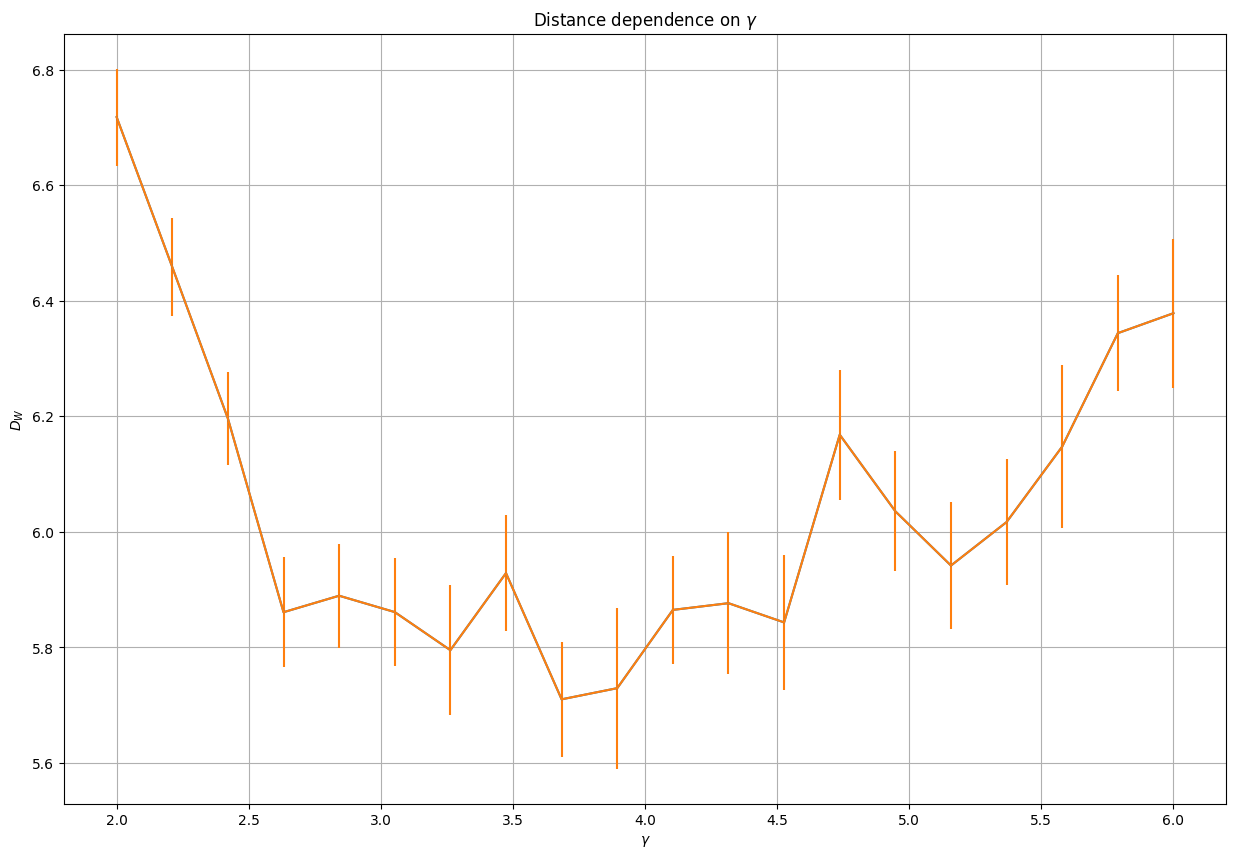

In [43]:
plt.figure(figsize=(15, 10))

plt.plot(new_gammas, distances.mean(axis=0))
plt.errorbar(new_gammas, distances.mean(axis=0), yerr=distances.std(axis=0) / distances.shape[0] ** 0.5)

plt.grid()

plt.title(r'Distance dependence on $\gamma$')
plt.xlabel(r'$\gamma$')
plt.ylabel(r'$D_W$')

plt.show()

In [44]:
gamma = 4
pca = KernelPCA(2, kernel='sigmoid', gamma=gamma)

distances_list = []
for _ in range(10):
    distances = []
    
    for sigma in np.linspace(0, 1, 10):
        points_3d = generate_cylinder(100, noise=sigma)
        points_2d = pca.fit_transform(points_3d)

        distances.append(calc_distance(points_3d, points_2d))
        
    distances_list.append(distances)
    
distances = np.array(distances_list)

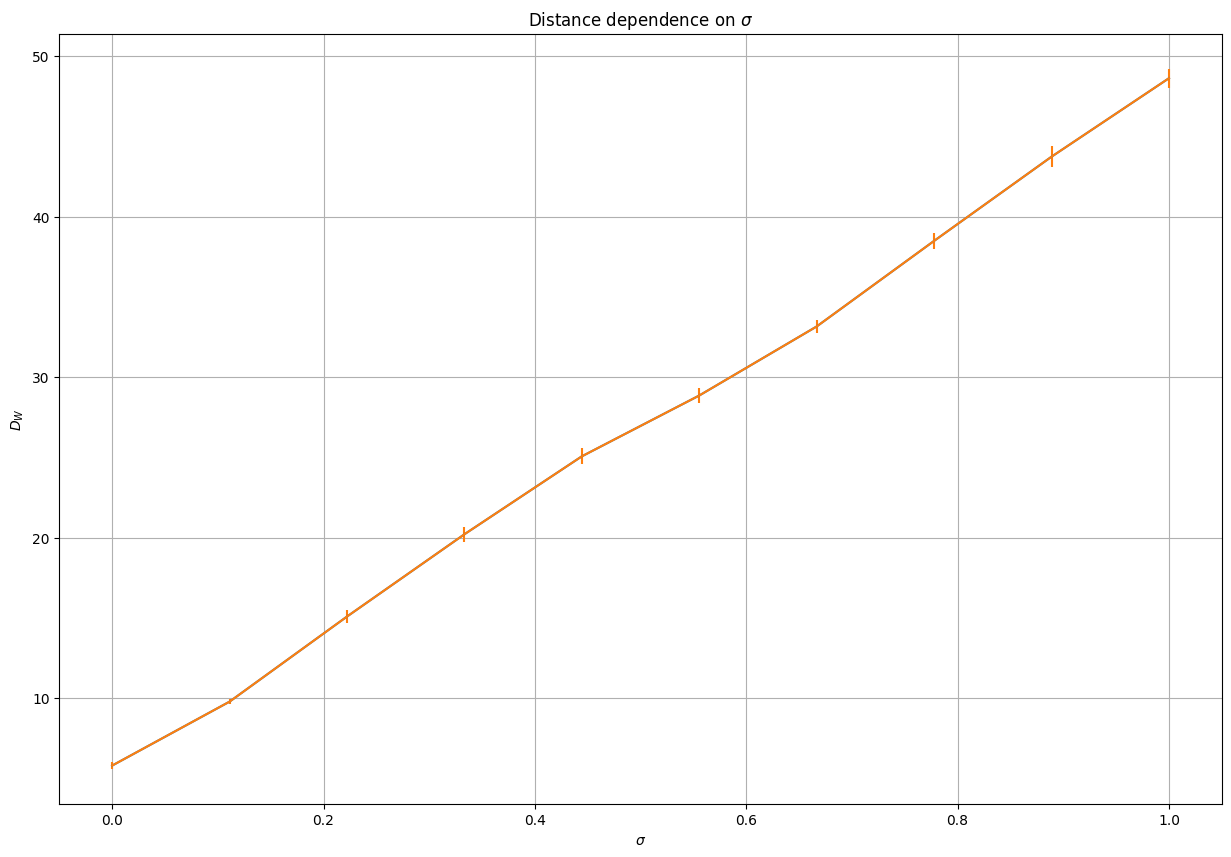

In [45]:
plt.figure(figsize=(15, 10))

plt.plot(np.linspace(0, 1, 10), distances.mean(axis=0))
plt.errorbar(np.linspace(0, 1, 10), distances.mean(axis=0), yerr=distances.std(axis=0) / distances.shape[0] ** 0.5)

plt.grid()

plt.title(r'Distance dependence on $\sigma$')
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$D_W$')

plt.show()

In [46]:
gamma = 4
pca = KernelPCA(2, kernel='sigmoid', gamma=gamma)

distances_list = []
for _ in range(10):
    distances = []
    
    for sigma in np.linspace(0, 0.1, 10):
        points_3d = generate_cylinder(100, noise=sigma)
        points_2d = pca.fit_transform(points_3d)

        distances.append(calc_distance(points_3d, points_2d))
        
    distances_list.append(distances)
    
distances = np.array(distances_list)

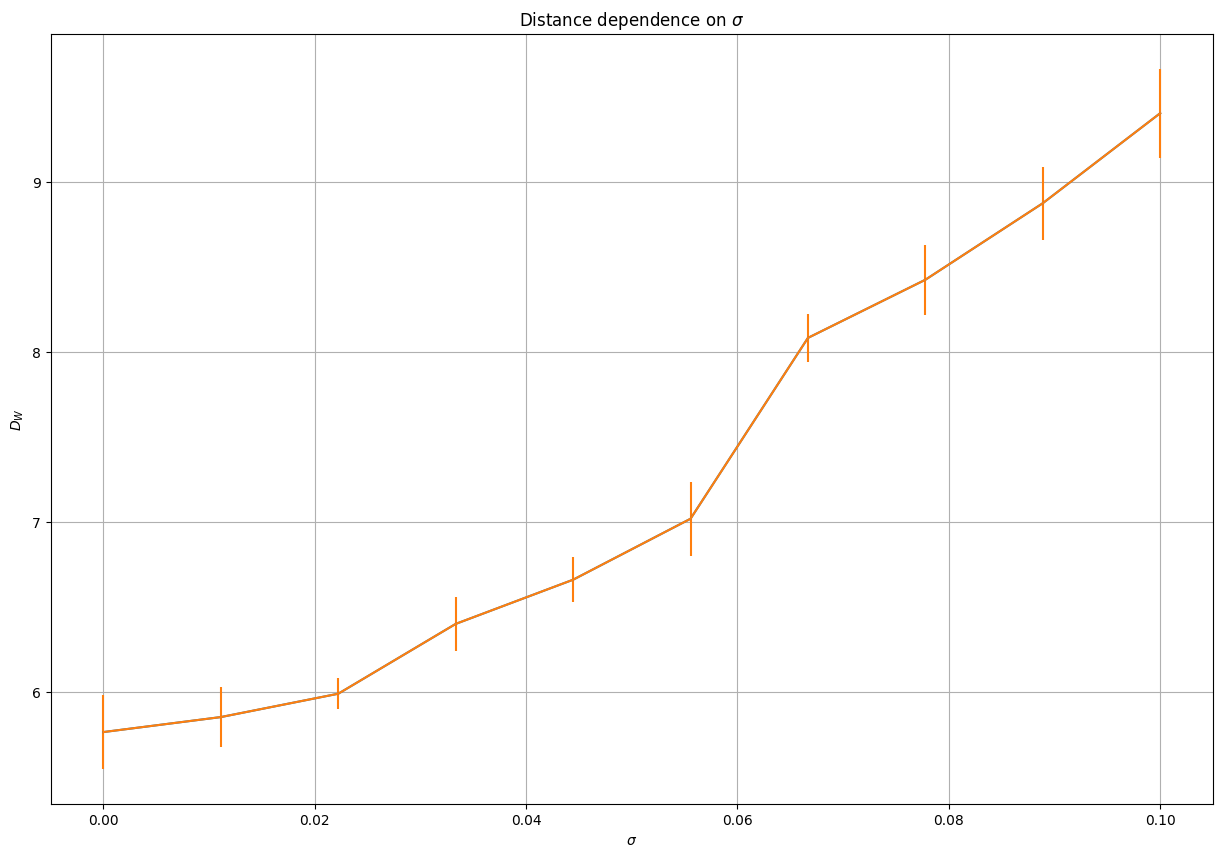

In [47]:
plt.figure(figsize=(15, 10))

plt.plot(np.linspace(0, 0.1, 10), distances.mean(axis=0))
plt.errorbar(np.linspace(0, 0.1, 10), distances.mean(axis=0), yerr=distances.std(axis=0) / distances.shape[0] ** 0.5)

plt.grid()

plt.title(r'Distance dependence on $\sigma$')
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$D_W$')

plt.show()

LLE
LLE: 0.13 sec
LTSA
LTSA: 0.29 sec
Hessian LLE
Hessian LLE: 0.37 sec
Modified LLE
Modified LLE: 0.29 sec
Isomap
Isomap: 0.42 sec
MDS
MDS: 2.9 sec
SE
SE: 0.15 sec
t-SNE
t-SNE: 3.2 sec


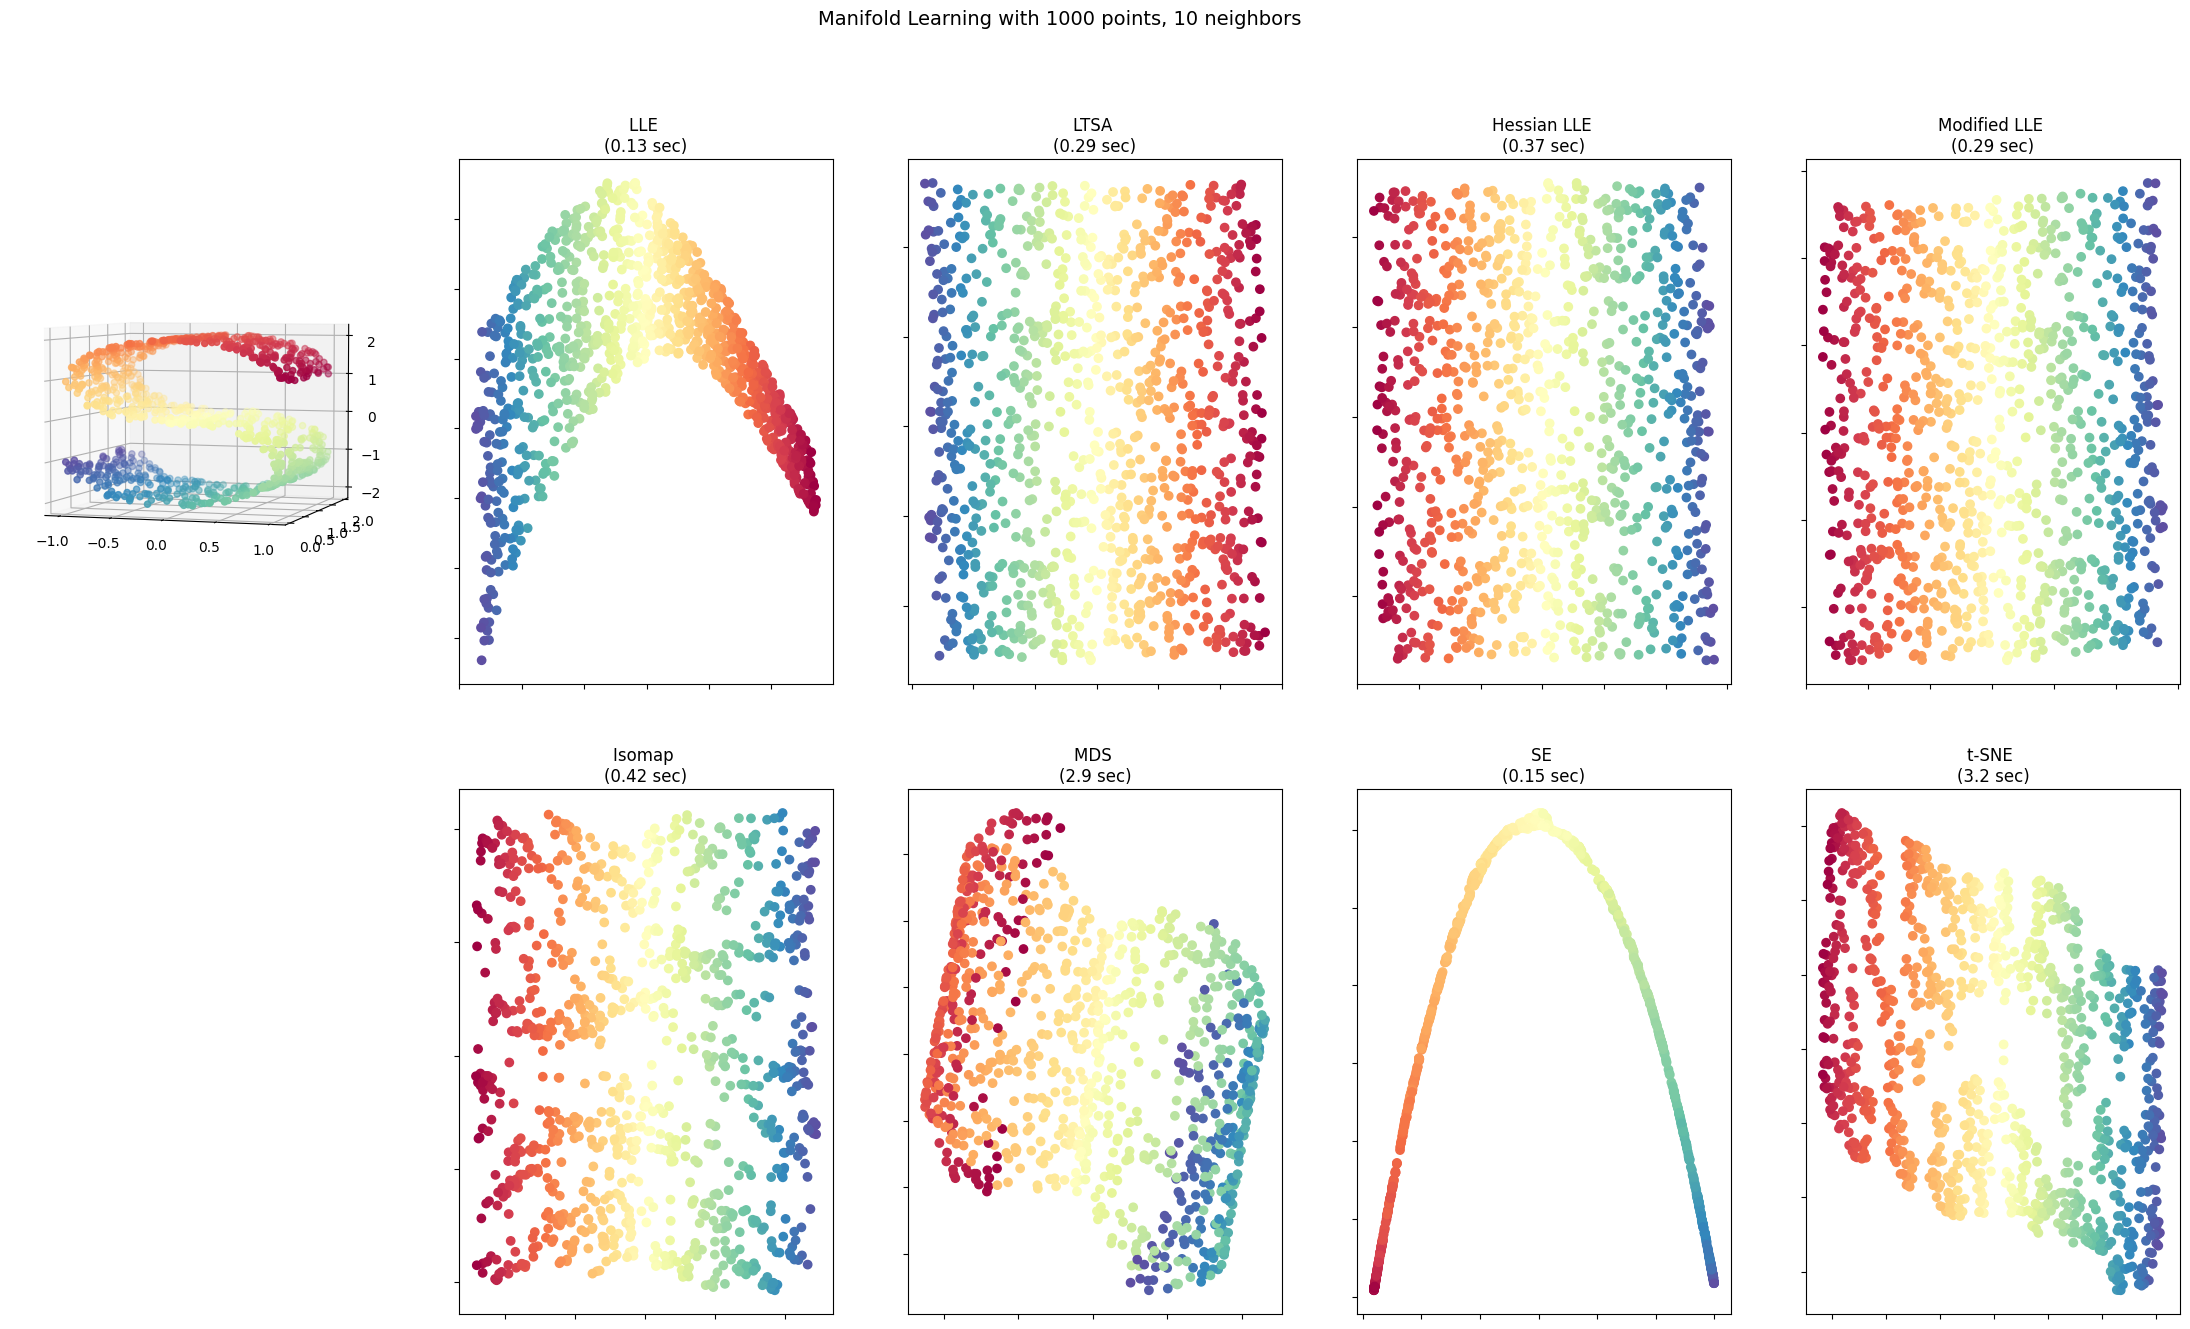

In [78]:

from collections import OrderedDict
from functools import partial
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

# Create figure
fig = plt.figure(figsize=(28, 15))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

# Add 3d scatter plot
ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

# Set-up manifold methods
LLE = partial(manifold.LocallyLinearEmbedding,
              n_neighbors, n_components, eigen_solver='auto')

methods = OrderedDict()
methods['LLE'] = LLE(method='standard')
methods['LTSA'] = LLE(method='ltsa')
methods['Hessian LLE'] = LLE(method='hessian')
methods['Modified LLE'] = LLE(method='modified')
methods['Isomap'] = manifold.Isomap(n_neighbors, n_components)
methods['MDS'] = manifold.MDS(n_components, max_iter=100, n_init=1)
methods['SE'] = manifold.SpectralEmbedding(n_components=n_components,
                                           n_neighbors=n_neighbors)
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca',
                                 random_state=0)

for i, (label, method) in enumerate(methods.items()):
    print(label)
    t0 = time()
    Y = method.fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    ax.set_title("%s \n(%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

plt.show()


In [79]:
class Centered_Interval:
    def __init__(self, center, interval):
        self.center = center
        self.interval = interval 

    def __str__(self):
        return str([self.center, self.interval])

    def __repr__(self):
        return str(self)

In [80]:
def method_initialization(n_components, n_neighbors):
    LLE = partial(manifold.LocallyLinearEmbedding,
              n_neighbors, n_components, eigen_solver='auto')

    methods = OrderedDict()
    methods['LLE'] = LLE(method='standard')
    methods['LTSA'] = LLE(method='ltsa')
    methods['Hessian LLE'] = LLE(method='hessian')
    methods['Modified LLE'] = LLE(method='modified')
    methods['Isomap'] = manifold.Isomap(n_neighbors, n_components)
    methods['MDS'] = manifold.MDS(n_components, max_iter=100, n_init=1)
    methods['SE'] = manifold.SpectralEmbedding(n_components=n_components,
                                            n_neighbors=n_neighbors)
    methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca',
                                    random_state=0)
    return methods 

def dataset_initialization(n_points, dataset):
    if (dataset == 'S_curve'):
        X, color = datasets.make_s_curve(n_points, random_state=0)
        return X, color

In [81]:
# всякие тех. методы (используются только для поиска субоптимальных параметров - т.е. там, где перебираем *не все* варианты)

def upper_round(number):
    if (number % 1 != 0):
        return int(number + 1 - (number%1))
    return int(number)

def lower_round(number):
    return int(number)

def find_center_points(interval, number_of_intervals, base_ring='Integer'):
    if (base_ring == 'Integer'):
        base_left_cor = interval[0]
        int_length = interval[1] - interval[0]
        interval_length = int_length / number_of_intervals
        centered_intervals_list = []
        max_length = 0
        for pos in range(0, number_of_intervals):
            left_corner = lower_round(interval_length * pos + base_left_cor)
            right_corner = upper_round(interval_length * (pos + 1) + base_left_cor)
            interval = [left_corner, right_corner]
            center = lower_round((left_corner + right_corner) / 2)
            centered_interval = Centered_Interval(center, interval)
            centered_intervals_list.append(centered_interval)
            max_length = max(max_length, right_corner - left_corner)
        return centered_intervals_list, max_length
            
def iterable_object_from_interval(interval, interval_type='k_neighbours'):
    if (interval_type == 'k_neighbours'):
        return range(interval[0], interval[1] + 1)

In [82]:
# Непосредственно сами методы поиска оптимальных параметров

# interval - в каком интервале лежит оптимальный параметр
# method_name - метод, для которого ищем оптимальный параметр 
# old_data - данные, на котором обучаем method_name и на которых ищем оптимальный метод

def find_optimal_subintervals_wrapper(interval, method_name, old_data,
                                        d_distances,
                                        number_suboptimal_intervals = 3, 
                                        number_of_intervals = 10,
                                        max_length_of_opt_interval = 3,
                                        training_algorithm='k_neighbours'):
    if (training_algorithm == 'k_neighbours'):
        pre_optimal_points = find_optimal_subintervals(interval=interval, method_name=method_name, old_data=old_data, 
                                            d_distances=d_distances,
                                            number_suboptimal_intervals=number_suboptimal_intervals,
                                            number_of_intervals=number_of_intervals, 
                                            max_length_of_opt_interval=max_length_of_opt_interval)
        shortest_distance = math.inf
        closest_neigh = -1 
        if (type(pre_optimal_points) == type([])):
            for pt in pre_optimal_points:
                if pt not in d_distances:
                    print("ERROR: все точки должны быть инициализированы в словаре соседи-расстояние, но эта точка не заициниализировалась = " + str(pt))
                else:
                    if d_distances[pt] < shortest_distance:
                        shortest_distance = d_distances[pt]
                        closest_neigh = pt
        else:
            closest_neigh = pre_optimal_points
        return closest_neigh
            

# Finding sub-optimal parameter for kNN parameter (all methods depends on #k neighbours)
# new_data = method.fit_transform(old_data) - valid for all methods 
# number_of_intervals - число интервалов, на которые делим исходный interval 
# number_suboptimal_intervals - в каждом интервале мы берем середину и смотрим диаграммное расстояние от преобразованных данных до исходных
# этот параметр отвечает за то, сколько параметров рассматриваем в дальнейшем
# Интервал - "непрерывный" сегмент, в котором ищем оптимальное число соседей. Например, interval = [1, 10] - значит будет искать оптимальное число соседей от 1 до 10

# Текущая реализация сильно завязана на то, что ищем оптимальный параметр - число соседей (в частности есть завязка на класс Centered_Interval)
def find_optimal_subintervals(interval, method_name, old_data, d_distances,
                                number_suboptimal_intervals = 3, 
                                number_of_intervals = 10,
                                max_length_of_opt_interval = 3):
    if (interval[1] == interval[0]):
        if interval[1] not in d_distances:
            methods = method_initialization(n_components=2, n_neighbors=interval[1])
            method = methods[method_name]
            new_data = method.fit_transform(old_data)
            distance = calc_distance(old_data, new_data)
            d_distances[interval[1]] = distance 
        return interval[1]

    center_points, max_length = find_center_points(interval, number_of_intervals)         # возвращает середины в разбиении интервала interval на #number_of_intervals 
                                                                                          # а так же максимальную длину интервала                                                 

    if (max_length <= max_length_of_opt_interval):
        distances_list = []                                                               # список списков: distances_list[i] = [kNN, distance_for_k]
                                                                                          # т.е. первое - число соседей для обучения метода, второе - диаграммное расстояние
        for pointed_point in center_points:
            for interval_pt in iterable_object_from_interval(pointed_point.interval):
                if interval_pt not in d_distances:
                    methods = method_initialization(n_components=2, n_neighbors=interval_pt)
                    method = methods[method_name]
                    new_data = method.fit_transform(old_data)
                    distance = calc_distance(old_data, new_data)
                    d_distances[interval_pt] = distance 
                distances_list.append([interval_pt, d_distances[interval_pt]])
        distances_list.sort(key=lambda x: x[1])
        return distances_list[0][0]

    # а вот тут - рекурсия. Выбираем "оптимальные" интервалы (их число - параметр number_suboptimal_intervals)
    # а потом на оптимальных интервалах запускаем снова find_optimal_subintervals
    sub_result = []
    centered_intervals_distance_list = []                                                  # list[i] = [Centered_interval_ins, distance_for_point]
    for pointed_point in center_points:
        center = pointed_point.center
        if center not in d_distances:
            methods = method_initialization(n_components=2, n_neighbors=center)
            method = methods[method_name]
            new_data = method.fit_transform(old_data)
            distance = calc_distance(old_data, new_data)
            d_distances[center] = distance 
        centered_intervals_distance_list.append([pointed_point, d_distances[center]])
    centered_intervals_distance_list.sort(key=lambda x: x[1])
    for i in range(number_suboptimal_intervals):
        sub_result.append(find_optimal_subintervals(interval=centered_intervals_distance_list[i][0].interval,  
                                    method_name=method_name, 
                                    old_data=old_data, 
                                    number_suboptimal_intervals = number_suboptimal_intervals, 
                                    number_of_intervals = number_of_intervals,
                                    max_length_of_opt_interval = max_length_of_opt_interval,
                                    d_distances = d_distances))
    return sub_result


In [83]:
# метод для тестирования скорости работы

def speed_test(algorithm_name, n_points, n_neighbors):
    X, color = dataset_initialization(n_points, 'S_curve')
    start = time.time()
    methods = method_initialization(n_components=2, n_neighbors=n_neighbors)
    method = methods[algorithm_name]
    new_data = method.fit_transform(X)
    finish_train = time.time()
    print("обучение для n точек = " + str(n_points) + ", k соседей = " + str(n_neighbors) + ", заняло = " + str(finish_train - start))
    distance = calc_distance(X, new_data)
    finish_calc_dist = time.time()
    print("расчет диаг. расст. для n точек = " + str(n_points) + ", k соседей = " + str(n_neighbors) + ", занял = " + str(finish_calc_dist - finish_train))

In [96]:
def find_optimal_neighbor(algorithm_name, min_neighbors, X, d_distances, number_suboptimal_intervals=3, number_of_intervals=10, full_iterate=False, max_neighbors=-1):
    if (max_neighbors == -1):
        n_points = len(X)
        max_neighbors = int(n_points * 0.06)
    print(max_neighbors)
    if (full_iterate):
        number_of_intervals = max_neighbors - min_neighbors
        number_suboptimal_intervals = number_of_intervals
    optimal_neighbors = find_optimal_subintervals_wrapper([min_neighbors, max_neighbors], algorithm_name, X, 
                                                            d_distances=d_distances,
                                                            number_suboptimal_intervals=number_suboptimal_intervals, 
                                                            number_of_intervals=number_of_intervals)
    return optimal_neighbors

In [85]:
def construct_plot(d_neigh_distance):
    figure(figsize=(24, 8), dpi=80)

    plt.title('Distance dependence on k')
    plt.xlabel('diagram distance')
    plt.ylabel('number of neighbors')


    plt.bar(range(len(d_neigh_distance)), list(d_neigh_distance.values()), align='center')
    plt.xticks(range(len(d_neigh_distance)), list(d_neigh_distance.keys()))
    plt.show()


In [86]:
# d_distance_between_data_sets = {}                               # key = число ближайших соседей. 
                                                                # Value - диаграммное расстояние между old_data & method.fit_transform(old_data)

d_min_neighbors_methods = {'LLE': 3,
                           'LTSA': 6,
                           'Hessian LLE': 6,
                           'Modified LLE': 4,
                           'Isomap': 1,
                           'MDS': 1,
                           'SE': 1,
                           't-SNE': 1}

X, color = dataset_initialization(1000, 'S_curve')
# === Построение графиков === #
# WARN: для 1000 точек код ниже выполняется достаточно долго (0.5-1 час) # 
'''
# Create figure
fig = plt.figure(figsize=(28, 15))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

fig2 = plt.figure(figsize=(28, 15))
fig2.suptitle("Manifold Learning with %i points, but for #neighbor finding with brute force"
             % (1000), fontsize=14)

# Add 3d scatter plot
ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

az = fig2.add_subplot(251, projection='3d')
az.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
az.view_init(4, -72)

for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

    res = find_optimal_neighbor(label, 1000, 30, 30, min_neighbors=d_min_neighbors_methods[label], X=X, max_neighbors=30)
    retrain_methods = method_initialization(n_components=2, n_neighbors=res)
    retrain_method = retrain_methods[label]
    Y = retrain_method.fit_transform(X)
    t2 = time()
    az = fig2.add_subplot(2, 5, 2 + i + (i > 3))
    az.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    az.set_title("%s \n(%.2g sec), \n#neigh = %s" % (label, t2 - t1, str(res)))
    az.xaxis.set_major_formatter(NullFormatter())
    az.yaxis.set_major_formatter(NullFormatter())
    az.axis('tight')
    d_distance_between_data_sets = {} 

plt.show()

# speed_test('LTSA', 200, 12)
# res = find_optimal_neighbor('LTSA', 1000, 30, 30, min_neighbors=6, X=X, max_neighbors=30)
# print(res)
# print(d_distance_between_data_sets)

# construct_plot(d_distance_between_data_sets)
'''
# === Конец построения графиков === #

'\n# Create figure\nfig = plt.figure(figsize=(28, 15))\nfig.suptitle("Manifold Learning with %i points, %i neighbors"\n             % (1000, n_neighbors), fontsize=14)\n\nfig2 = plt.figure(figsize=(28, 15))\nfig2.suptitle("Manifold Learning with %i points, but for #neighbor finding with brute force"\n             % (1000), fontsize=14)\n\n# Add 3d scatter plot\nax = fig.add_subplot(251, projection=\'3d\')\nax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)\nax.view_init(4, -72)\n\naz = fig2.add_subplot(251, projection=\'3d\')\naz.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)\naz.view_init(4, -72)\n\nfor i, (label, method) in enumerate(methods.items()):\n    t0 = time()\n    Y = method.fit_transform(X)\n    t1 = time()\n    print("%s: %.2g sec" % (label, t1 - t0))\n    ax = fig.add_subplot(2, 5, 2 + i + (i > 3))\n    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)\n    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))\n    ax.xaxis.set_ma

In [87]:
def plot_by_dict(d, xlabel, ylabel, title):
    lists = sorted(d.items()) # sorted by key, return a list of tuples

    x, y = zip(*lists) # unpack a list of pairs into two tuples

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.plot(x, y)
    plt.show()

In [88]:
# график расстояния между диаграммами от числа соседей 
# график времени обучения и вычисления расстояния на диаграммах от числа соседей
'''
label = 'Isomap'
d_distance_between_data_sets = {}
d_train_time = {}
d_calc_dist_time = {}
X, color = dataset_initialization(1000, 'S_curve')
# начало внешнего цикла по каждому алгоритму
for k, (label, method) in enumerate(methods.items()):
    for i in range(d_min_neighbors_methods[label], 30 + 1):
        t0 = time()
        retrain_methods = method_initialization(n_components=2, n_neighbors=i)
        retrain_method = retrain_methods[label]
        Y = retrain_method.fit_transform(X)
        t1 = time()
        distance = calc_distance(X, Y)
        t2 = time()
        d_distance_between_data_sets[i] = distance 
        d_train_time[i] = t1 - t0
        d_calc_dist_time[i] = t2 - t1 

    # строим 3 графика по словарям
    plot_by_dict(d_distance_between_data_sets, "#neigh", "distance dependence", label)
    plot_by_dict(d_train_time, "#neigh", "train time (s)", label)
    plot_by_dict(d_calc_dist_time, "#neigh", "calc dist time (s)", label)
    d_distance_between_data_sets = {}
    d_train_time = {}
    d_calc_dist_time = {}
'''
# конец внешнего цикла по каждому алгоритму 


'\nlabel = \'Isomap\'\nd_distance_between_data_sets = {}\nd_train_time = {}\nd_calc_dist_time = {}\nX, color = dataset_initialization(1000, \'S_curve\')\n# начало внешнего цикла по каждому алгоритму\nfor k, (label, method) in enumerate(methods.items()):\n    for i in range(d_min_neighbors_methods[label], 30 + 1):\n        t0 = time()\n        retrain_methods = method_initialization(n_components=2, n_neighbors=i)\n        retrain_method = retrain_methods[label]\n        Y = retrain_method.fit_transform(X)\n        t1 = time()\n        distance = calc_distance(X, Y)\n        t2 = time()\n        d_distance_between_data_sets[i] = distance \n        d_train_time[i] = t1 - t0\n        d_calc_dist_time[i] = t2 - t1 \n\n    # строим 3 графика по словарям\n    plot_by_dict(d_distance_between_data_sets, "#neigh", "distance dependence", label)\n    plot_by_dict(d_train_time, "#neigh", "train time (s)", label)\n    plot_by_dict(d_calc_dist_time, "#neigh", "calc dist time (s)", label)\n    d_dista

In [89]:
from ripser import ripser
from persim import plot_diagrams
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

def construct_diagram(data, title='title', maxdim=2, thresh=1):
    dgms = ripser(data, maxdim=2)['dgms']
    plot_diagrams(dgms, show=True, title=title)

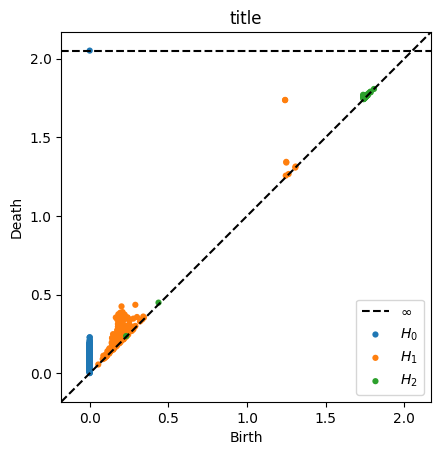

In [90]:
construct_diagram(X)

In [91]:
import inspect 

inspect.getfullargspec(plot_diagrams)

FullArgSpec(args=['diagrams', 'plot_only', 'title', 'xy_range', 'labels', 'colormap', 'size', 'ax_color', 'diagonal', 'lifetime', 'legend', 'show', 'ax'], varargs=None, varkw=None, defaults=(None, None, None, None, 'default', 20, array([0., 0., 0.]), True, False, True, False, None), kwonlyargs=[], kwonlydefaults=None, annotations={})

In [92]:
test = generate_cylinder(100)
print(calc_distance(test, test))
print(calc_distance(test, test*100))

0.0
1431.352233359823


In [99]:
# d_diagram_distances = {}: key - имя (лейбл) метода. Value = d_distance_between_data_sets = {}. key в d_distance_between_data_sets - число соседей, 
# value - диаграммное расстояние между исходной выборкой и результатом обучения алгоритма (лейбл = ключ в d_diagram_distances) на числе соседей - ключ в d_distance_between_data_sets
# d_optimal_values = {}: key - имя (лейбл) метода. Value - оптимальный параметр (оптимизация идет полным перебором, метрика - диаграммное расстояние)
d_diagram_distances = {}
d_optimal_values = {}

# WARN: потом нужно поменять формат intervals на d_intervals, key=лейбл метода, value=список интервалов, по которым итерируемся. 
# IN: d_intervals = {}: key - имя (лейбл) метода, value = список интервалов = [interval_1, ..., interval_k]
# interval_i - по какому интервалу итерируемся для поиска оптимального параметра (формат: [left_corner, right_corner]) 
# (например, если interval_1 = [1, 30] то мы ищем оптимальный параметр в интервале [1, 30])
# interval_i - левая и правая граница интервала, т.е. это непрерывный кусок. Если нужно искать в разных непересекающихся интервалах - просто перечисляем их в intervals 
# IN: d_methods = словарь методов, в которых ищем оптимальные параметры
# IN: data - данные, на которых обучаемся
#
# OUT: (d_diagram_distances, d_optimal_values)
def find_optimal_parameters_and_return_dict_distances(d_intervals, d_methods, data):
    for k, (label, method) in enumerate(d_methods.items()):
        # итерируемся по всем методам
        # инициализируем d_diagram_distances текущим методом
        d_diagram_distances[label] = {}

        opt_distance = math.inf 
        opt_param = None
        for interval in d_intervals[label]:
            # итерируемся по интервалам. 
            min_neighbors = interval[0]
            max_neighbors = interval[1]
            res = find_optimal_neighbor(label, min_neighbors=min_neighbors, X=data, max_neighbors=max_neighbors, full_iterate=True, d_distances=d_diagram_distances[label])
            # d_distance должен быть теперь корректно заполнен, потому что параметр в питоне - это ссылка на объект. 

            if opt_param is None:
                opt_param = res 
                opt_distance = d_diagram_distances[label][opt_param]
            else:
                if d_diagram_distances[label][res] < opt_distance:
                    opt_param = res 
                    opt_distance = d_diagram_distances[label][opt_param]
        d_optimal_values[label] = opt_param
    return (d_diagram_distances, d_optimal_values)

In [105]:
X, color = dataset_initialization(260, 'S_curve')

d_intervals = {}
intervals = [[50, 50], [100, 100], [150, 150]]
methods = method_initialization(n_components=2, n_neighbors=10)

for k, (label, method) in enumerate(methods.items()):
    d_intervals[label] = [[d_min_neighbors_methods[label], 25]]

for k, (label, method) in enumerate(methods.items()):
    for interval in intervals:
        d_intervals[label].append(interval)

find_optimal_parameters_and_return_dict_distances(d_intervals=d_intervals, d_methods=methods, data=X)

25
50
100
150
25
50
100
150
25
50
100
150
25
50
100
150
25
50
100
150
25
50
100
150
25
C:\Users\test\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\test\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\test\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embeddin

({'LLE': {3: 35.80397920801573,
   4: 36.08443714060969,
   5: 36.55256640723613,
   6: 36.698714368658706,
   7: 36.96862137236991,
   8: 36.80231815517897,
   9: 37.56103166176606,
   10: 37.648630859605895,
   11: 36.8303920607189,
   12: 36.94520557477296,
   13: 36.40791360712702,
   14: 36.91567839382651,
   15: 36.772731751516964,
   16: 36.8142593226255,
   17: 36.8718489720085,
   18: 37.624831021706186,
   19: 37.172150746962735,
   20: 37.27787874567374,
   21: 37.312849113703166,
   22: 37.35796463721795,
   23: 37.29482428718904,
   24: 37.37797844433466,
   25: 37.355605980416314,
   50: 37.41235798897127,
   100: 36.845146604538776,
   150: 36.629121246386546},
  'LTSA': {6: 36.87921779626819,
   7: 37.18369490195059,
   8: 37.40078578420457,
   9: 37.56899166996903,
   10: 37.5667566953215,
   11: 37.57967648126189,
   12: 37.56533718546254,
   13: 37.56499139893332,
   14: 37.56486715917265,
   15: 37.56584974215212,
   16: 37.567782055073806,
   17: 37.5725518982226,


In [98]:
print(d_optimal_values)

{'LLE': 15, 'LTSA': 23, 'Hessian LLE': 24, 'Modified LLE': 23, 'Isomap': 15, 'MDS': 12, 'SE': 22, 't-SNE': 10}
